In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
import plotly.express as px
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score


## Data Preparation

This dataset has a large amount of missing values which is the main focus of exploration and prep initially. Some exploration and visualization is done after the columns with a high amount of missing data are dropped. After that, imputation and encoding are performed to prepare the data for the next phase. 

In [36]:
df_train = pd.read_csv("application_train.csv")
df_test = pd.read_csv("application_test.csv")
print(df_train.shape)
print(df_test.shape)
print(df_train.isnull().sum())
print(df_test.isnull().sum())
print(df_train.describe())
print(df_test.describe())
print(df_train.dtypes)
print(df_test.dtypes)

(307511, 122)
(48744, 121)
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05

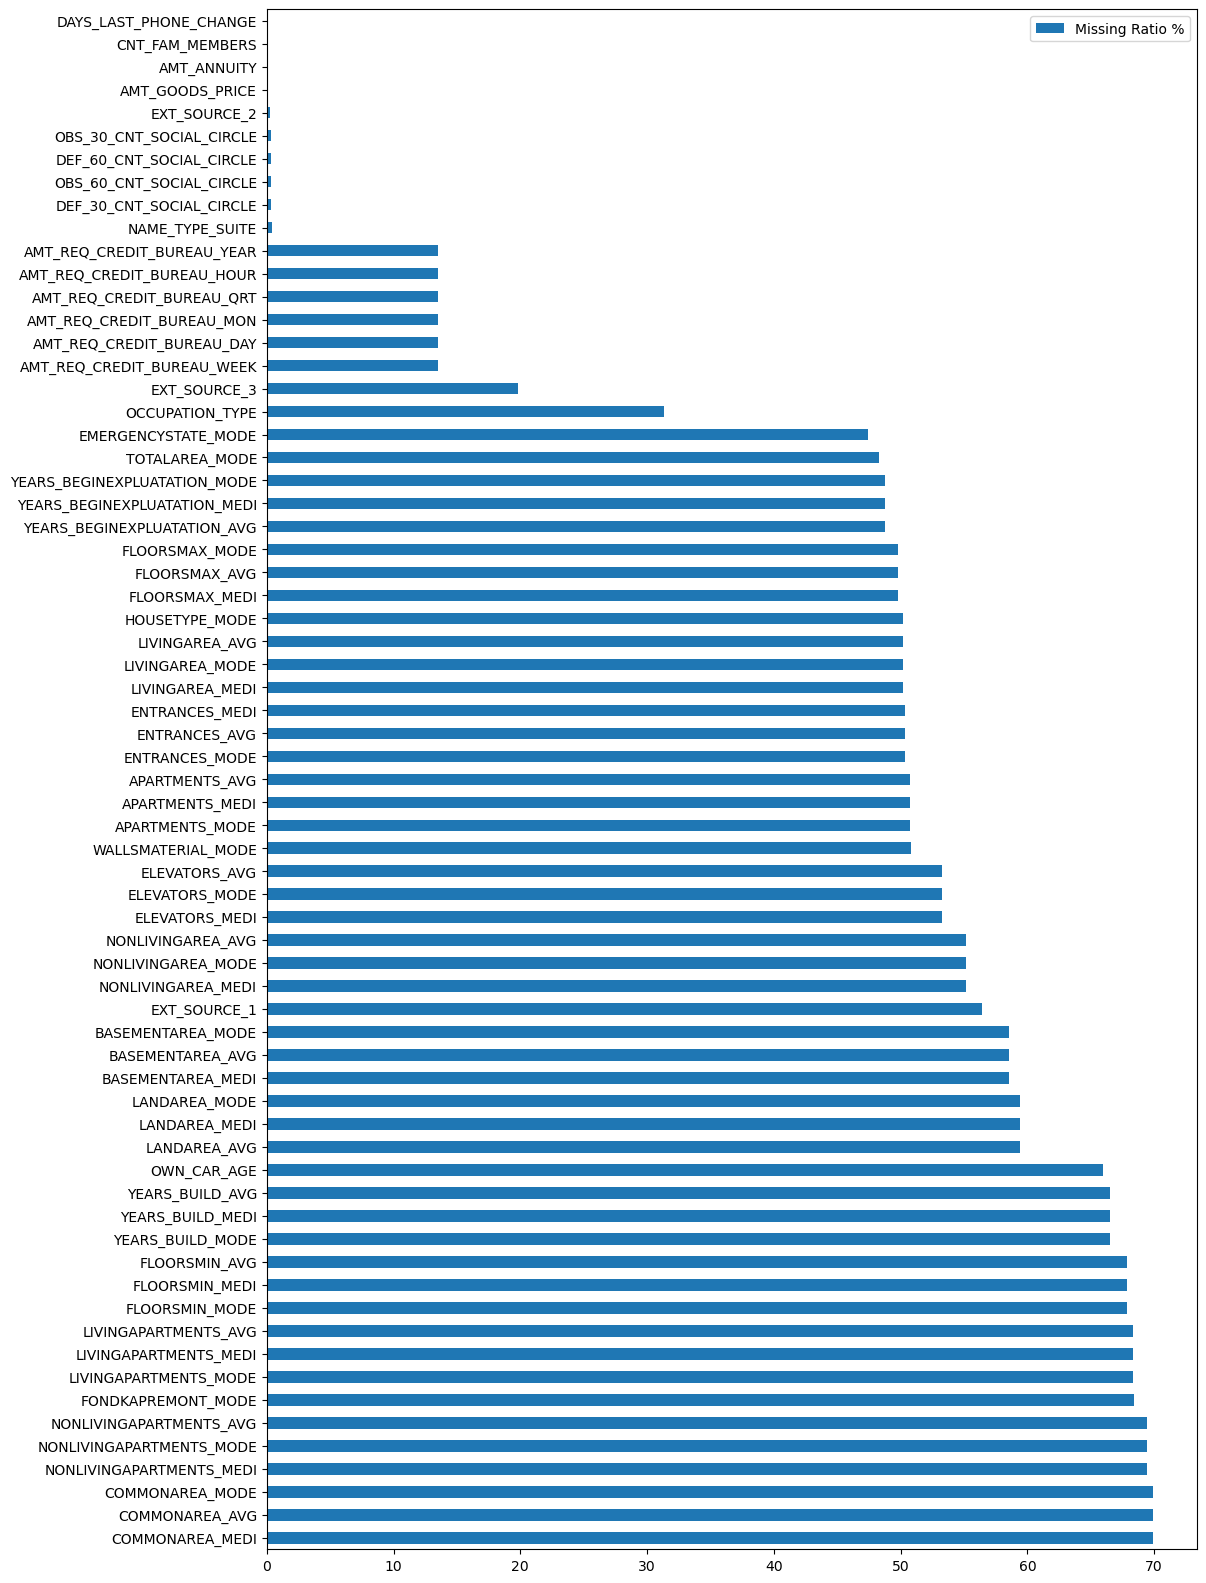

In [37]:
# Examining the missing values
if df_train.isnull().sum().sum() != 0:
    na_df = (df_train.isnull().sum() / len(df_train)) * 100      
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.plot(kind = "barh")
    plt.show()
plot_width, plot_height = (14,20)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.show()
   


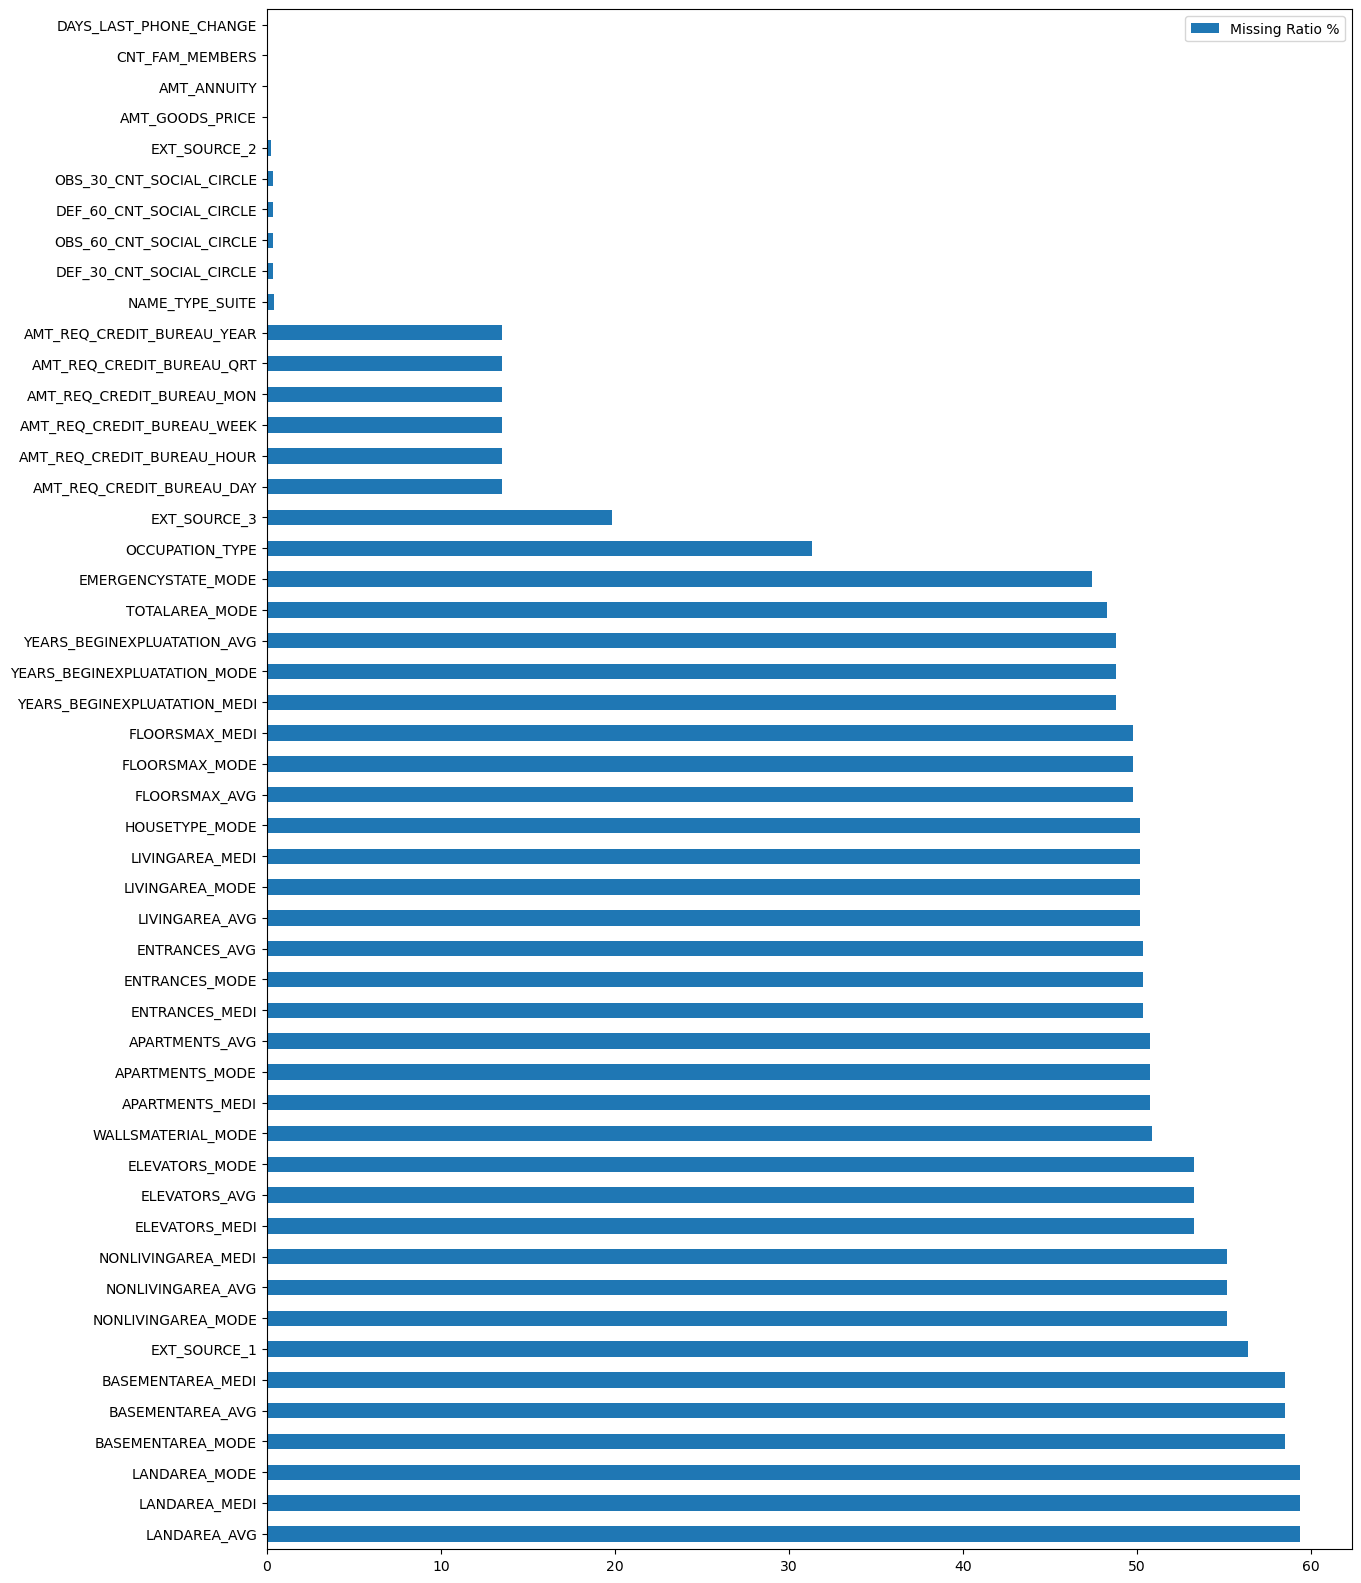

In [38]:
# Dropping the columns with over 60% of values missing
df_train.dropna(axis = 1, thresh = 0.4 * len(df_train), inplace = True)
df_test.dropna(axis = 1, thresh = 0.4 * len(df_test), inplace = True)

if df_train.isnull().sum().sum() != 0:
    na_df = (df_train.isnull().sum() / len(df_train)) * 100      
    na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
    missing_data.plot(kind = "barh")
    plt.show()
plot_width, plot_height = (12,20)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

In [39]:
for col in df_train.columns:
    print(col, df_train[col].isna().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
ELEVATORS_AVG 163891
ENTRANCES_AVG 154828
FLOORSMAX_AVG 153020
LAND

In [40]:

mean_cols = ["AMT_ANNUITY", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", 
             "FLOORSMAX_AVG", "LANDAREA_AVG", "LIVINGAREA_AVG", "NONLIVINGAREA_AVG", "FLOORSMAX_MODE", "LANDAREA_MODE", "LIVINGAREA_MODE", "NONLIVINGAREA_MODE", 
             "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "FLOORSMAX_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE", "DAYS_LAST_PHONE_CHANGE", 
             "LANDAREA_MEDI"]
median_cols = ["AMT_GOODS_PRICE", "AMT_ANNUITY", "CNT_FAM_MEMBERS", "APARTMENTS_AVG", "YEARS_BEGINEXPLUATATION_MEDI", "OBS_30_CNT_SOCIAL_CIRCLE", 
               "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", ]
mode_cols = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "BASEMENTAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "ELEVATORS_MEDI", 
             "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", 
             "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR", "YEARS_BEGINEXPLUATATION_MODE"]



In [41]:
# Perform imputation on the remaining missing values, based on the nauture of each column
for col in mean_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    df_test[col] = df_test[col].fillna(df_test[col].mean())

for col in median_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())

for col in mode_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())



0
0


## Data Exploration

The main goal here is to identify what significant charateristics are in the dataset, as well as what will need to be accounted for later, to build the best model possible. 

<Axes: xlabel='TARGET', ylabel='count'>

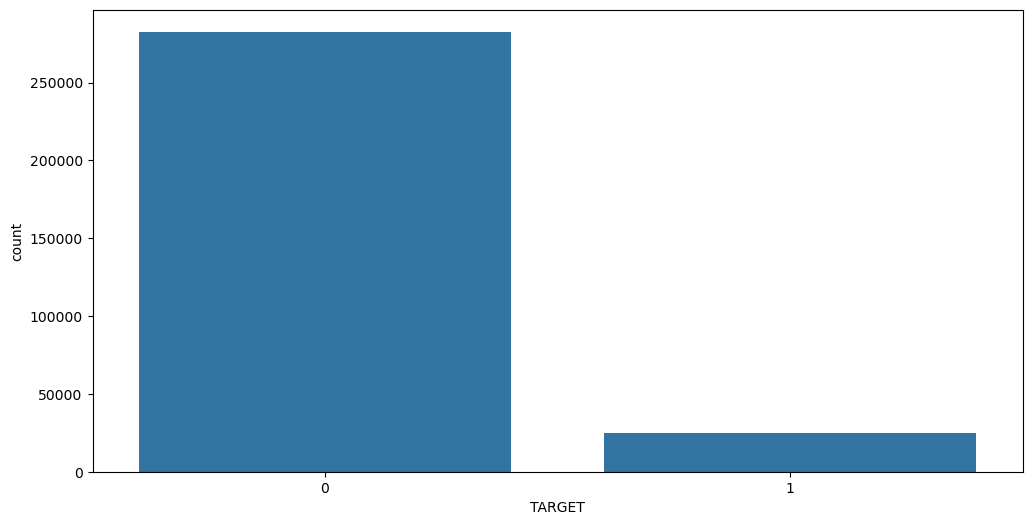

In [42]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df_train, x = "TARGET")


This data is heavily biased to non-default loans. We will need to apply oversampling/undersampling techniques to correct the imbalance. 

<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

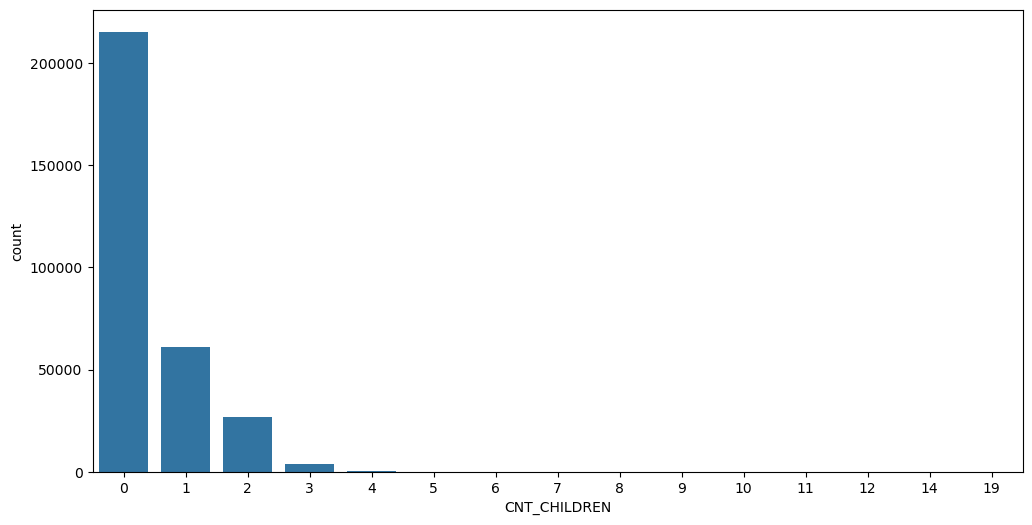

In [43]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df_train, x = "CNT_CHILDREN")


<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

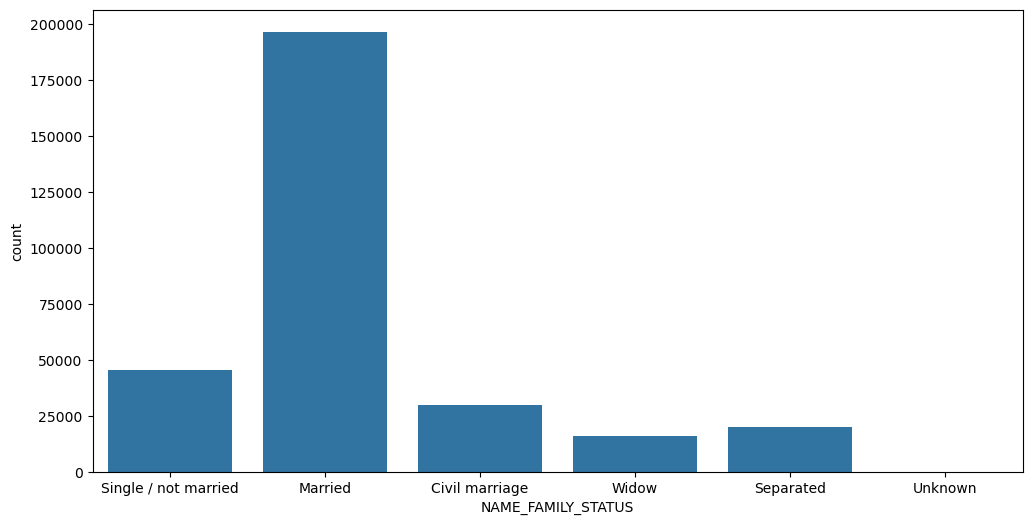

In [44]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df_train, x = "NAME_FAMILY_STATUS")

The above two plots tell us a lot about the main group we are dealing with, that being married people without kids. Of course there are a significant amount of exceptions, but this demographic dominates the dataset, as it probably dominates the home buyer demographic on the whole. 

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

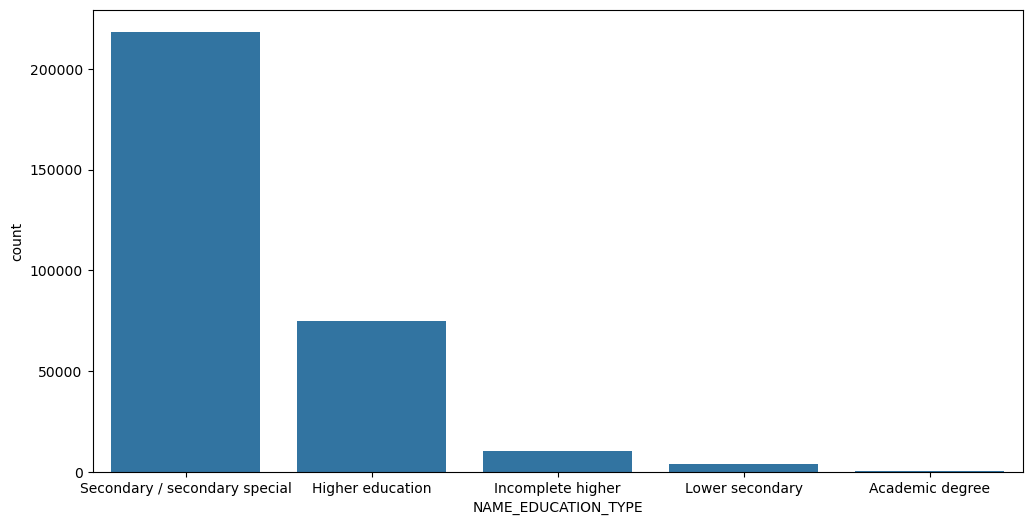

In [45]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df_train, x = "NAME_EDUCATION_TYPE")

Most of the data is people who have received a high school education, with most of the rest of the data having some type of college education. 

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

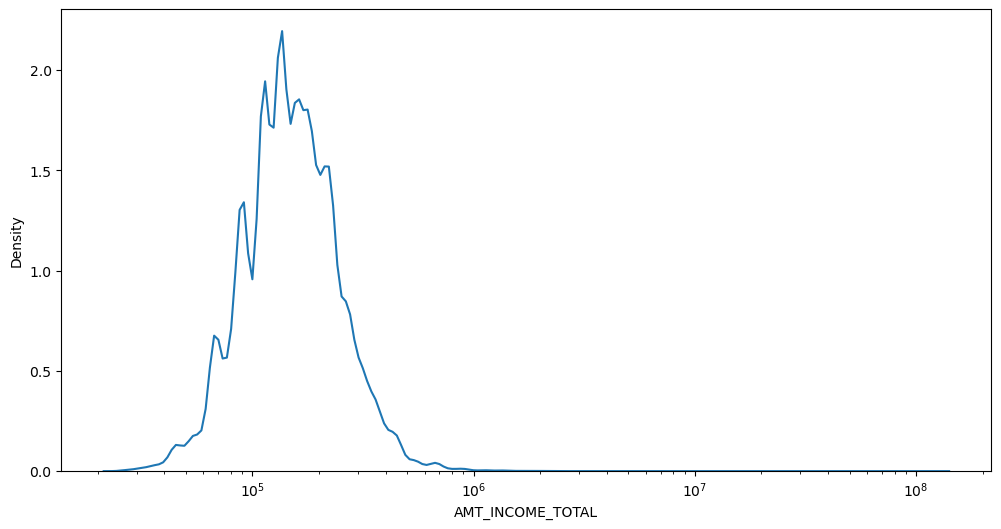

In [46]:
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df_train, x = "AMT_INCOME_TOTAL", log_scale = True, bw_method = "silverman", bw_adjust = 1.5)

This plot, representing density of incomes logarithmically scaled, shows a majority of our sample household incomes fall around the low end of six figures. We also have fairly even tails to both sides, and a fairly normal looking distribution. 

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

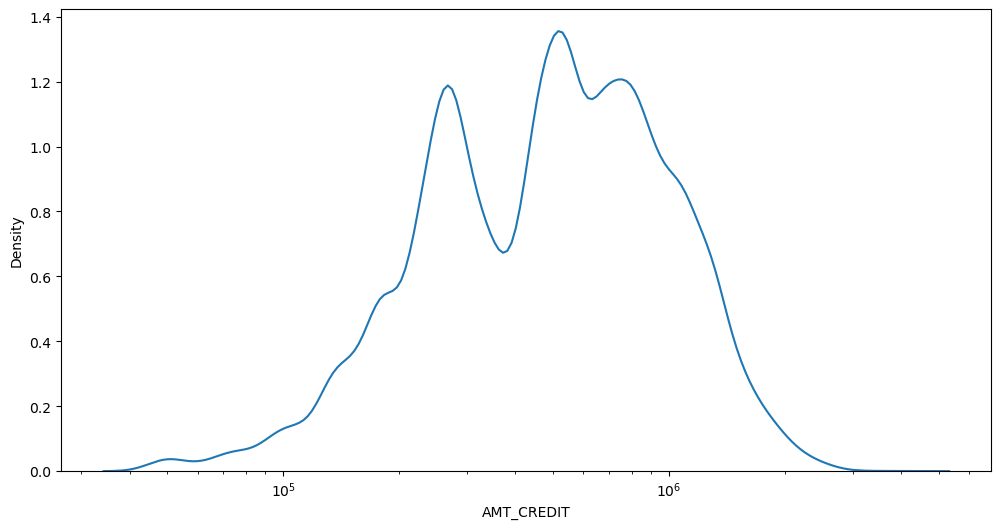

In [47]:
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df_train, x = "AMT_CREDIT", log_scale = True, bw_method = "silverman", bw_adjust = 1.5)

There's a fairly odd distribution of amount of credit from the loans we have surveyed, with a significant dip in density around the mid 6 figure range with density rebounding above its first peak towards the upper range of six figures. This is a little strange considering the fairly uniform distributon of income observed earlier, as correlation of these two metrics might make sense. 

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

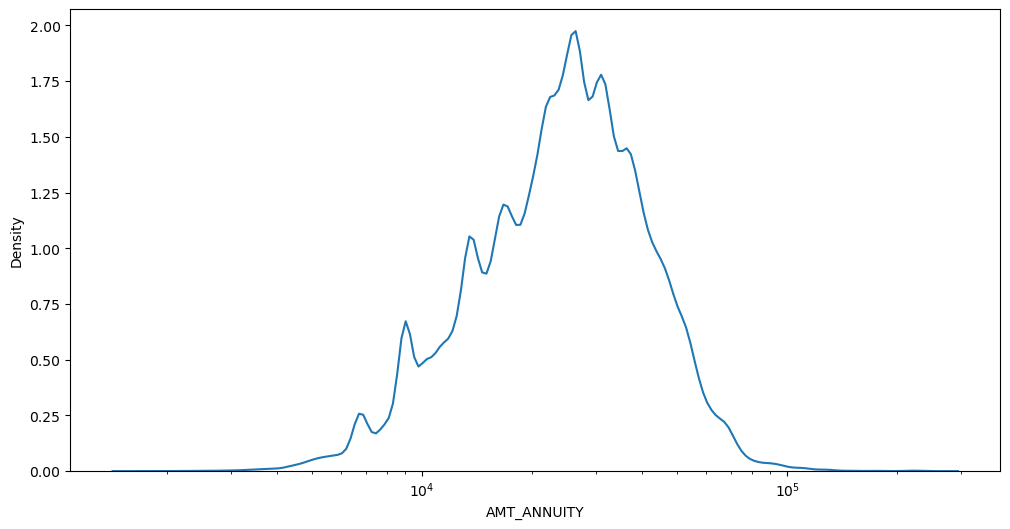

In [48]:
plt.figure(figsize = (12, 6))
sns.kdeplot(data = df_train, x = "AMT_ANNUITY", log_scale = True)

The distribution of annuity on these loans is fairly uniform, which tracks with the income distribution we observed. 

In [49]:
# Encoding variables after exploration has ceased
str_cols = [element for element in df_train.columns if df_train[element].dtype == "object"]
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)
df_train.head(5)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,True,False,True,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,True,False,False,False,False,False,False,True,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,True,False,False,True,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,True,False,False,True,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,True,False,False,True,False


## Sample Balancing

Here we aim to balance out the amount of default and non default data points in our training set using SMOTE.

In [51]:
# Organize train/test data into features and labels
df_train_y = df_train["TARGET"]
df_train_X = df_train.drop("TARGET", axis = 1)

# Check counts of values before oversampling
counter_before = Counter(df_train_y)
print(f"Counts of values before SMOTE: {counter_before}")

smt = SMOTE()
df_train_X, df_train_y = smt.fit_resample(df_train_X, df_train_y)
counter_after = Counter(df_train_y)
print(f"Counts of values after SMOTE: {counter_after}")


Counts of values before SMOTE: Counter({0: 282686, 1: 24825})
Counts of values after SMOTE: Counter({1: 282686, 0: 282686})


After SMOTE is performed there are the same amount of default data points as non-default data points.

## Normalizing the data

In [52]:
scaler = StandardScaler()

train_scaled = scaler.fit_transform(df_train_X)
test_scaled = scaler.fit_transform(df_test)
print(train_scaled)

[[-1.73940702 -0.52197046  0.08944521 ... -0.1711842   0.06489499
  -0.11088428]
 [-1.73939723 -0.52197046  0.25677056 ... -0.1711842   0.06489499
  -0.11088428]
 [-1.73938745 -0.52197046 -0.24520549 ... -0.1711842   0.06489499
  -0.11088428]
 ...
 [ 1.53225472 -0.52197046 -0.07788014 ... -0.1711842   0.06489499
  -0.11088428]
 [-0.840624   -0.52197046 -0.07788014 ... -0.1711842   0.06489499
  -0.11088428]
 [ 0.83678277 -0.52197046 -0.15631501 ... -0.1711842   0.06489499
  -0.11088428]]


## Split data
Our test data doesn't have labels, so we need to split the training data to evalute the model. 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    train_scaled, df_train_y, test_size=0.2, random_state=12)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=12)


print(train_scaled.shape, X_train.shape, X_test.shape, X_val.shape)

(565372, 225) (361837, 225) (113075, 225) (90460, 225)


## Constructing and testing the model

The sequential API is used to construct the NN because our model will take in singular input tensors (a row of features) and give a single output (a 0 or 1 to reflect its default prediction) with no need to add in data at any point. 

In [54]:
model = Sequential([
    Dense(128, input_shape = (225,), activation = "relu"),
    Dropout(0.3),  
    Dense(64, activation = "relu"),
    Dropout(0.3),
    Dense(32, activation = "relu"),
    Dense(1, activation = "sigmoid")  
])

In [55]:
# Defining the loss function, optimizer, and metric
# Accuracy is used because we have balanced our prediction classes with SMOTE, and will give a good idea of model performance
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [56]:
# Define our early stopping to stop the model when the loss begins to increase
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=256, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50


2024-12-16 10:09:56.305185: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1414/1414 [==============================] - 2s 2ms/step - loss: 0.1742 - accuracy: 0.9411 - val_loss: 0.1383 - val_accuracy: 0.9560
Epoch 2/50
1414/1414 [==============================] - 2s 2ms/step - loss: 0.1433 - accuracy: 0.9546 - val_loss: 0.1383 - val_accuracy: 0.9563
Epoch 3/50
1414/1414 [==============================] - 2s 2ms/step - loss: 0.1407 - accuracy: 0.9549 - val_loss: 0.1361 - val_accuracy: 0.9565
Epoch 4/50
1414/1414 [==============================] - 2s 2ms/step - loss: 0.1391 - accuracy: 0.9552 - val_loss: 0.1379 - val_accuracy: 0.9564
Epoch 5/50
1414/1414 [==============================] - 2s 2ms/step - loss: 0.1386 - accuracy: 0.9552 - val_loss: 0.1365 - val_accuracy: 0.9565
Epoch 6/50
1414/1414 [==============================] - 2s 2ms/step - loss: 0.1381 - accuracy: 0.9552 - val_loss: 0.1380 - val_accuracy: 0.9566
Epoch 7/50
1414/1414 [==============================] - 2s 2ms/step - loss: 0.1377 - accuracy: 0.9553 - val_loss: 0.1361 - val_accuracy: 0.9565
Epo

In [57]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy {accuracy:.3f}")
print(f"Model loss {loss:.3f}")

3534/3534 [==============================] - 1s 303us/step - loss: 0.1356 - accuracy: 0.9566
Model accuracy 0.957
Model loss 0.136


## Cross Validation 
Ensure our model is not overfitting the data. 

In [58]:
kf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 12)

acc_lst = []
for train_index, test_index in kf.split(train_scaled, df_train_y):
    X_train, X_test = train_scaled[train_index], train_scaled[test_index]
    y_train, y_test = df_train_y[train_index], df_train_y[test_index]

    model.fit(X_train, y_train)
    loss, accuracy = model.evaluate(X_test, y_test)
    acc_lst.append(accuracy)

avg = np.mean(acc_lst)
print(f"Average cross validated accuracy score: {avg:.2f}")

4417/4417 [==============================] - 1s 307us/step - loss: 0.1367 - accuracy: 0.9560
Average cross validated accuracy score: 0.96


## Testing model on the validation data

This validation data is data that the model has never used for training, therefore we hope to get an idea of how the model is performing in a more realistic scenario. 

In [60]:
loss, acc = model.evaluate(X_val, y_val)

print(f"Accuracy of model on validation portion of the data: {acc:.3f}")

2827/2827 [==============================] - 1s 297us/step - loss: 0.1359 - accuracy: 0.9562
Accuracy of model on validation portion of the data: 0.956


## Comparison to other Model

For the sake of comparison, we will construct a random forest model on the data to see how the model built shapes up. 

In [61]:
rf = RFC()

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

acc = accuracy_score(y_test, pred)

In [62]:
print(f"Accuracy of the Random Forest model: {acc:.3f}")

Accuracy of the Random Forest model: 0.956


In [63]:
kf = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 12)

acc_lst = []
for train_index, test_index in kf.split(train_scaled, df_train_y):
    X_train, X_test = train_scaled[train_index], train_scaled[test_index]
    y_train, y_test = df_train_y[train_index], df_train_y[test_index]

    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)

    acc = accuracy_score(y_test, pred)
    acc_lst.append(acc)

avg = np.mean(acc_lst)
print(f"Average cross validated accuracy score: {avg:.3f}")

Average cross validated accuracy score: 0.956


We can see the RF performs similarly the neural network on the validation data initially, and keeps this up when cross validating. However, to fit the model and make a prediction (on my computer) it took the random forest nearly triple the time to make an inital fit compared to the NN, as well as RF taking 8x the time to cross validate. This is mainly because of our early stopping methodology used when training the NN. Overall for this use case these methods perform similarly with more intensive training required for the random forest.
